In [56]:
# importing important libralies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [57]:
# read the csv file
df_fake=pd.read_csv("C:\\Users\\stpgh\\Downloads\\Documents\\news\\news.csv")

In [58]:
# displaying the data
df_fake.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [59]:
df_fake.shape

(6335, 4)

In [60]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [61]:
df_fake.drop('Unnamed: 0',inplace=True,axis=1)

In [62]:
# dropping duplicate values
df_fake.drop_duplicates(inplace=True)
df_fake.shape

(6306, 3)

In [63]:
# unique value count
col=df_fake.columns.to_list()

for cols in col:
    print(f"{cols:>34}: No. of unique items:{df_fake[cols].nunique():>8}")

                             title: No. of unique items:    6256
                              text: No. of unique items:    6060
                             label: No. of unique items:       2


In [64]:
# title value counts
df_fake['title'].value_counts()

Michael Moore Owes Me $4.99                                                                           3
OnPolitics | 's politics blog                                                                         3
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence    3
The Deceptive Nature of Hillary Clinton is Right in Line with Communism                               2
Democratic debate: 6 takeaways                                                                        2
                                                                                                     ..
Hillary To Be Indicted After Election: Trump Responds To FBI Investigation                            1
#NeverTrump Goes Down in Flames in Final Attempt to Stop The Donald                                   1
Surprised About Donald Trump's Popularity? You Shouldn't Be                                           1
How To Plan Farmer’s Calendar All Year Round                    

In [65]:
# news value counts
labels=df_fake['label'].value_counts()
labels

REAL    3154
FAKE    3152
Name: label, dtype: int64

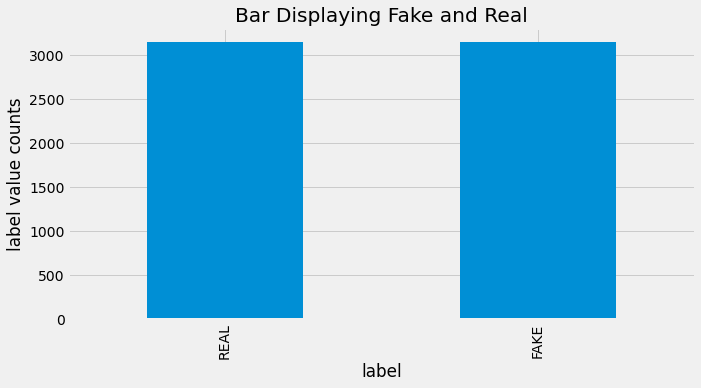

In [66]:
# ploting the fake and real news
plt.figure(figsize=[10,5])
df_fake.label.value_counts().plot(kind='bar')
plt.title('Bar Displaying Fake and Real')
plt.xlabel('label')
plt.ylabel('label value counts')
plt.show()

In [67]:
# importing tools to model our data using sklearn
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [68]:
#Get the labels from label
labels=df_fake['label']
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [69]:
# get the texts from text
texts=df_fake['text']
texts

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6306, dtype: object

In [70]:
#Split the dataset into train and test data
x_train,x_test,y_train,y_test=train_test_split(texts, labels, test_size=0.2, random_state=7)

In [71]:
#Initializing a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.8)

In [72]:
#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [73]:
#Initializing a PassiveAggressiveClassifier
pass_Ag=PassiveAggressiveClassifier()
pass_Ag.fit(tfidf_train,y_train)

PassiveAggressiveClassifier()

In [74]:
#Predict on the test set and calculate accuracy
y_pred=pass_Ag.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.9%


In [75]:
#Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[622,  40],
       [ 37, 563]], dtype=int64)